In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [13]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
x_train.shape

(50000, 32, 32, 3)

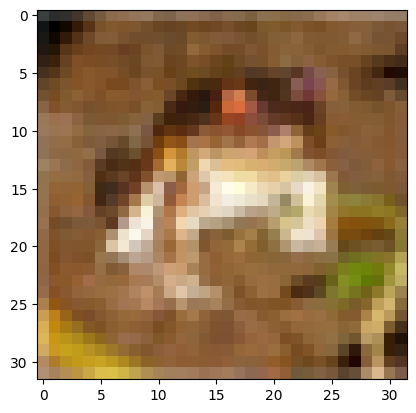

In [15]:
plt.imshow(x_train[0])

In [16]:
train_images = x_train.astype('float32') / 255.0
test_images = x_test.astype('float32') / 255.0

train_images.shape

(50000, 32, 32, 3)

In [17]:
train_labels = y_train
test_labels = y_test


In [18]:
# Convert images to grayscale (single channel)
train_images= tf.image.rgb_to_grayscale(train_images)
test_images = tf.image.rgb_to_grayscale(test_images)

print(train_images.shape)  
print(test_images.shape)   

(50000, 32, 32, 1)
(10000, 32, 32, 1)


## Model

In [26]:

model = tf.keras.Sequential()

# First Conv Layer with Batch Normalization
model.add(Conv2D(filters=64, kernel_size=3, padding='same', input_shape=(32, 32, 1)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(tf.keras.layers.ReLU())  # Apply ReLU after Batch Normalization
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.3))

# Second Conv Layer with Batch Normalization
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(tf.keras.layers.ReLU())  # Apply ReLU after Batch Normalization
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.3))

# Flatten the output and add Dense layers with Batch Normalization
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(tf.keras.layers.ReLU())  # Apply ReLU after Batch Normalization
model.add(Dropout(0.3))

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,066 (379.16 KB)

 Trainable params: 96,362 (376.41 KB)

 Non-trainable params: 704 (2.75 KB)

In [27]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
train_images.shape

TensorShape([50000, 32, 32, 1])

In [30]:
# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=22, 
                    batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6543 - loss: 0.9907 - val_accuracy: 0.5842 - val_loss: 1.2045
Epoch 2/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6577 - loss: 0.9845 - val_accuracy: 0.6697 - val_loss: 0.9519
Epoch 3/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6626 - loss: 0.9704 - val_accuracy: 0.5560 - val_loss: 1.2881
Epoch 4/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6600 - loss: 0.9767 - val_accuracy: 0.7031 - val_loss: 0.8696
Epoch 5/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6574 - loss: 0.9747 - val_accuracy: 0.6285 - val_loss: 1.0872
Epoch 6/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6590 - loss: 0.9794 - val_accuracy: 0.6391 - val_loss: 1.0574
Epoch 7/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6701 - loss: 0.9520 - val_accuracy: 0.6590 - val_loss: 0.9867
Epoch 8/22
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6637 - loss: 0.9548 - 

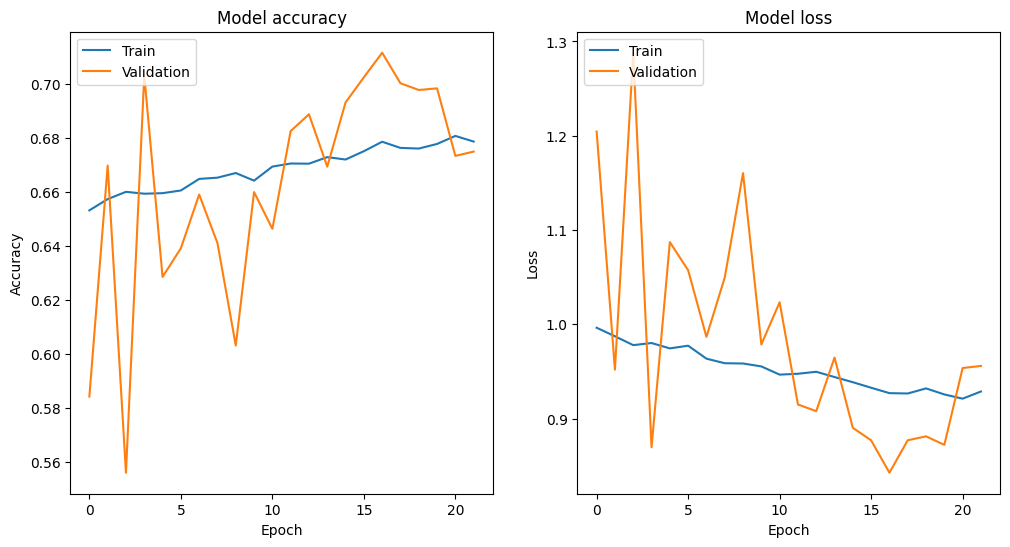

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()